<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
!pip install numpy pandas seaborn requests


We will import the following libraries for the lab


In [3]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
#Import reqests
import requests

This function is to plot the confusion matrix.


In [6]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [10]:
"""
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)
"""
import io
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL1)
data = pd.read_csv(io.StringIO(response.text))

print(data.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [230]:
print(data.count())

FlightNumber      90
Date              90
BoosterVersion    90
PayloadMass       90
Orbit             90
LaunchSite        90
Outcome           90
Flights           90
GridFins          90
Reused            90
Legs              90
LandingPad        64
Block             90
ReusedCount       90
Serial            90
Longitude         90
Latitude          90
Class             90
dtype: int64


In [224]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [261]:

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response = requests.get(URL1)
X = pd.read_csv(io.StringIO(response.text))

print(data.head())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [16]:
X.head(100)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [20]:
# Convert the column "Class" to a NumPy array and assign it to the variable Y
Y = data['Class'].to_numpy()

# Print the result
print(Y)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [24]:
X.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [114]:
print(X)

    FlightNumber        Date BoosterVersion   PayloadMass Orbit    LaunchSite  \
0              1  2010-06-04       Falcon 9   6104.959412   LEO  CCAFS SLC 40   
1              2  2012-05-22       Falcon 9    525.000000   LEO  CCAFS SLC 40   
2              3  2013-03-01       Falcon 9    677.000000   ISS  CCAFS SLC 40   
3              4  2013-09-29       Falcon 9    500.000000    PO   VAFB SLC 4E   
4              5  2013-12-03       Falcon 9   3170.000000   GTO  CCAFS SLC 40   
..           ...         ...            ...           ...   ...           ...   
85            86  2020-09-03       Falcon 9  15400.000000  VLEO    KSC LC 39A   
86            87  2020-10-06       Falcon 9  15400.000000  VLEO    KSC LC 39A   
87            88  2020-10-18       Falcon 9  15400.000000  VLEO    KSC LC 39A   
88            89  2020-10-24       Falcon 9  15400.000000  VLEO  CCAFS SLC 40   
89            90  2020-11-05       Falcon 9   3681.000000   MEO  CCAFS SLC 40   

        Outcome  Flights  G

In [118]:
# students get this 
transform = preprocessing.StandardScaler()
# Convert the Date column to numeric
X['Date'] = pd.to_datetime(X['Date'])
X['Date'] = (X['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Select only numeric columns
X_numeric = X.select_dtypes(include=[np.number])


# Fit and transform the numeric data
X_scaled = transform.fit_transform(X_numeric)

# Reassign the standardized data back to X
X[X_numeric.columns] = X_scaled

# Display the standardized data
print(X)

    FlightNumber  Date BoosterVersion   PayloadMass Orbit    LaunchSite  \
0      -1.712912   0.0       Falcon 9 -1.948145e-16   LEO  CCAFS SLC 40   
1      -1.674419   0.0       Falcon 9 -1.195232e+00   LEO  CCAFS SLC 40   
2      -1.635927   0.0       Falcon 9 -1.162673e+00   ISS  CCAFS SLC 40   
3      -1.597434   0.0       Falcon 9 -1.200587e+00    PO   VAFB SLC 4E   
4      -1.558942   0.0       Falcon 9 -6.286706e-01   GTO  CCAFS SLC 40   
..           ...   ...            ...           ...   ...           ...   
85      1.558942   0.0       Falcon 9  1.991005e+00  VLEO    KSC LC 39A   
86      1.597434   0.0       Falcon 9  1.991005e+00  VLEO    KSC LC 39A   
87      1.635927   0.0       Falcon 9  1.991005e+00  VLEO    KSC LC 39A   
88      1.674419   0.0       Falcon 9  1.991005e+00  VLEO  CCAFS SLC 40   
89      1.712912   0.0       Falcon 9 -5.192140e-01   MEO  CCAFS SLC 40   

        Outcome   Flights  GridFins  Reused   Legs                LandingPad  \
0     None None -0.

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [127]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [131]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [145]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
# Define the preprocessing for numeric and categorical features
numeric_features = ['FlightNumber', 'Date', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount', 'Longitude', 'Latitude']
categorical_features = ['BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome', 'LandingPad', 'Serial']

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Define the parameter grid
parameters = {"classifier__C": [0.01, 0.1, 1], 'classifier__penalty': ['l2'], 'classifier__solver': ['lbfgs']}

# Create the GridSearchCV object with cv=10
logreg_cv = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the data
logreg_cv.fit(X_train, Y_train)

# Get the best parameters
best_params = logreg_cv.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [148]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
accuracy : 0.8625


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [152]:
# Calculate the accuracy on the test data
accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data: ", accuracy)


Accuracy on test data:  1.0


Lets look at the confusion matrix:


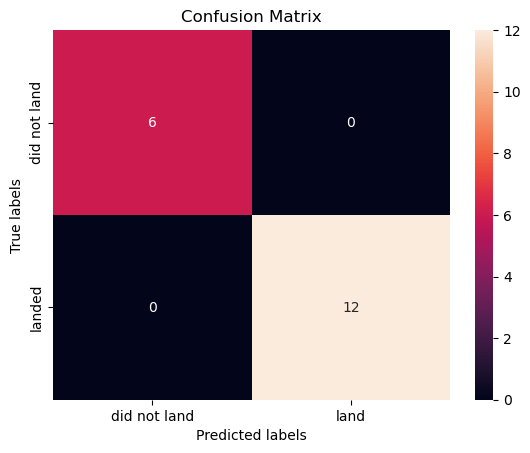

In [155]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [160]:
print(X_train)

    FlightNumber  Date BoosterVersion   PayloadMass Orbit    LaunchSite  \
30     -0.558140   0.0       Falcon 9 -7.488333e-03   GTO    KSC LC 39A   
27     -0.673617   0.0       Falcon 9 -1.081627e-01   GTO    KSC LC 39A   
44     -0.019246   0.0       Falcon 9 -4.016177e-01   GTO  CCAFS SLC 40   
35     -0.365678   0.0       Falcon 9 -6.843628e-01   ISS    KSC LC 39A   
57      0.481155   0.0       Falcon 9 -6.650847e-01   GTO    KSC LC 39A   
..           ...   ...            ...           ...   ...           ...   
43     -0.057739   0.0       Falcon 9 -1.948145e-16   LEO  CCAFS SLC 40   
22     -0.866079   0.0       Falcon 9 -8.242359e-01   ISS  CCAFS SLC 40   
72      1.058541   0.0       Falcon 9 -1.948145e-16    SO    KSC LC 39A   
15     -1.135526   0.0       Falcon 9 -7.771117e-01   ISS  CCAFS SLC 40   
40     -0.173216   0.0       Falcon 9 -5.151442e-01   GTO    KSC LC 39A   

       Outcome   Flights  GridFins  Reused   Legs                LandingPad  \
30   None None -0.65

In [162]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [240]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Assuming X_train and Y_train are already loaded in your notebook

# Step 1: Identify numeric and categorical columns
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

# Step 2: Create transformers for preprocessing

# Transformer for numeric data
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize features by removing the mean and scaling to unit variance
])

# Transformer for categorical data
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical variables to a one-hot encoded format
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# Step 3: Define the parameter grid for GridSearchCV
parameters = {
    'svc__kernel': ('linear', 'rbf', 'poly', 'sigmoid'),  # SVM kernel types to be tested
    'svc__C': np.logspace(-3, 3, 5),  # Regularization parameter range
    'svc__gamma': np.logspace(-3, 3, 5)  # Kernel coefficient range
}

# Step 4: Create a pipeline with preprocessing and the SVC
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('svc', SVC())])

# Set up GridSearchCV with the pipeline and parameter grid
svm_cv = GridSearchCV(pipeline, parameters, cv=10)  # 10-fold cross-validation

# Step 5: Fit the GridSearchCV object to find the best parameters
svm_cv.fit(X_train, Y_train)

# Retrieve the best parameters found by the grid search
best_params = svm_cv.best_params_
print("Best Parameters:", best_params)

# Step 6: Use the best model found for predictions or further evaluation
best_model = svm_cv.best_estimator_

# Example: Making predictions on the test set (assuming you have X_test)
# predictions = best_model.predict(X_test)


Best Parameters: {'svc__C': 0.03162277660168379, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}


In [242]:
# Convert 'Date' to numeric (ordinal)
X_train['Date'] = pd.to_datetime(X_train['Date']).map(lambda date: date.toordinal())

# Select the categorical columns to encode
categorical_columns = ['BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome', 'LandingPad', 'Serial']

# Apply one-hot encoding to categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)

# Define parameters for GridSearch
parameters = {"C": [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Initialize Logistic Regression model
lr = LogisticRegression(max_iter=10000)

# Create the GridSearchCV object with cv=10
svm_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the data
svm_cv.fit(X_train_encoded, Y_train)

# Get the best parameters
best_params = svm_cv.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [244]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 1.0


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [248]:
# Preprocess the test data

# Calculate accuracy on the test data
test_accuracy = logreg_cv.score(X_test, Y_test)


print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 1.0000


We can plot the confusion matrix


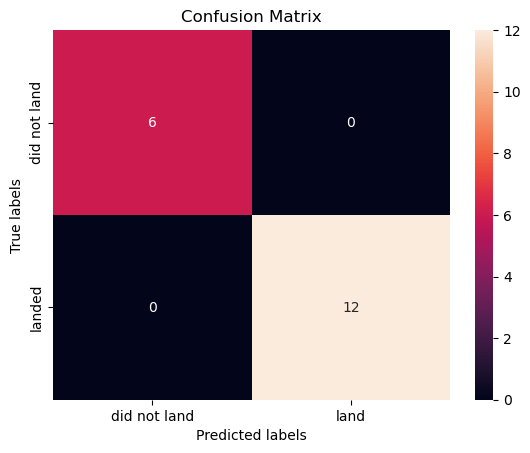

In [251]:
yhat=svm_cv.predict(X_test_encoded)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [255]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [257]:

# Adjusted parameters dictionary
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['sqrt', 'log2', None],  # Removed 'auto'
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}


# Create the GridSearchCV object with cv=10
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to your data
tree_cv.fit(X_train_encoded, Y_train)

# Get the best parameters found by GridSearchCV
best_params = tree_cv.best_params_
print("Best parameters found:", best_params)

# Get the best model found by GridSearchCV
best_model = tree_cv.best_estimator_

# Evaluate the best model (e.g., cross-validation score)
best_score = tree_cv.best_score_
print("Best cross-validation score:", best_score)


Best parameters found: {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation score: 1.0


In [258]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 1.0


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [200]:
# Calculate the accuracy on the test data
test_accuracy = tree_cv.score(X_test_encoded, Y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 1.0


We can plot the confusion matrix


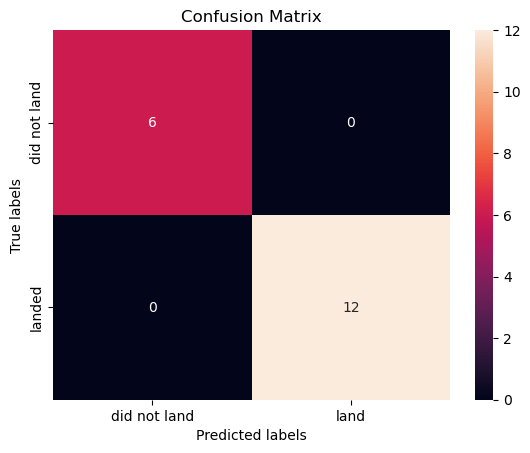

In [205]:
yhat = tree_cv.predict(X_test_encoded)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [209]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [211]:
# Create a GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
knn_cv.fit(X_train_encoded, Y_train)

# Display the best parameters found by GridSearchCV
print("Best parameters found: ", knn_cv.best_params_)

Best parameters found:  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 2}


In [213]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 2}
accuracy : 0.9857142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [217]:
# Calculate the accuracy on the test data
test_accuracy = knn_cv.score(X_test_encoded, Y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.9444444444444444


We can plot the confusion matrix


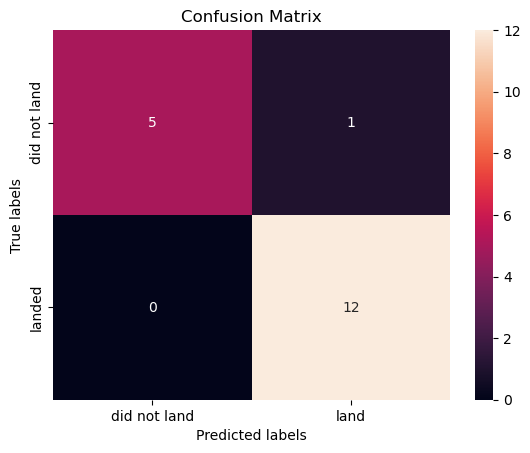

In [220]:
yhat = knn_cv.predict(X_test_encoded)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
